<a href="https://colab.research.google.com/github/FelixEbenezer/Web_Scraping_Sport_Divers/blob/main/Prediction_Foot_match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#AU CAS OU ON UTILISERAIT DE PASTA ZIPADA
import zipfile
path = '/content/drive/My Drive/LinkedIn_data.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [3]:
matches = pd.read_csv('/content/drive/MyDrive/matches.csv')
matches

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-14,15:00,Premier League,Matchweek 1,Sat,Home,W,3.0,0.0,...,Match Report,NaN,13.0,6.0,20.8,4.0,0.0,0.0,2022,Chelsea
1,2,2021-08-22,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,...,Match Report,NaN,22.0,5.0,14.6,0.0,0.0,0.0,2022,Chelsea
2,3,2021-08-28,17:30,Premier League,Matchweek 3,Sat,Away,D,1.0,1.0,...,Match Report,NaN,6.0,2.0,12.3,0.0,0.0,0.0,2022,Chelsea
3,4,2021-09-11,17:30,Premier League,Matchweek 4,Sat,Home,W,3.0,0.0,...,Match Report,NaN,12.0,4.0,22.5,0.0,0.0,0.0,2022,Chelsea
4,6,2021-09-19,16:30,Premier League,Matchweek 5,Sun,Away,W,3.0,0.0,...,Match Report,NaN,20.0,9.0,13.2,0.0,0.0,0.0,2022,Chelsea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
2637,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
2638,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
2639,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


In [4]:
matches.drop(['Unnamed: 0'], axis=1, inplace=True)
matches.head(2)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-14,15:00,Premier League,Matchweek 1,Sat,Home,W,3.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,6.0,20.8,4.0,0.0,0.0,2022,Chelsea
1,2021-08-22,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Arsenal,...,Match Report,NaN,22.0,5.0,14.6,0.0,0.0,0.0,2022,Chelsea


In [5]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [8]:
matches = matches.loc[: ,['date', 'time', 'day', 'venue', 'gf', 'ga','opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'referee', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'team', 'result']]
matches

,date,time,day,venue,gf,ga,opponent,xg,xga,poss,...,formation,referee,sh,sot,dist,fk,pk,pkatt,team,result
0,2021-08-14,15:00,Sat,Home,3.0,0.0,Crystal Palace,0.9,0.3,62.0,...,3-4-3,Jonathan Moss,13.0,6.0,20.8,4.0,0.0,0.0,Chelsea,W
1,2021-08-22,16:30,Sun,Away,2.0,0.0,Arsenal,2.9,0.3,65.0,...,3-4-3,Paul Tierney,22.0,5.0,14.6,0.0,0.0,0.0,Chelsea,W
2,2021-08-28,17:30,Sat,Away,1.0,1.0,Liverpool,0.8,2.6,35.0,...,3-4-3,Anthony Taylor,6.0,2.0,12.3,0.0,0.0,0.0,Chelsea,D
3,2021-09-11,17:30,Sat,Home,3.0,0.0,Aston Villa,1.1,1.5,57.0,...,3-4-3,Stuart Attwell,12.0,4.0,22.5,0.0,0.0,0.0,Chelsea,W
4,2021-09-19,16:30,Sun,Away,3.0,0.0,Tottenham,1.9,0.7,53.0,...,3-4-3,Paul Tierney,20.0,9.0,13.2,0.0,0.0,0.0,Chelsea,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2021-05-02,19:15,Sun,Away,0.0,4.0,Tottenham,0.5,2.0,34.0,...,3-4-1-2,Andre Marriner,8.0,1.0,17.4,0.0,0.0,0.0,Sheffield United,L
2637,2021-05-08,15:00,Sat,Home,0.0,2.0,Crystal Palace,0.7,2.1,50.0,...,3-5-2,Simon Hooper,7.0,0.0,11.4,1.0,0.0,0.0,Sheffield United,L
2638,2021-05-16,19:00,Sun,Away,1.0,0.0,Everton,1.6,1.3,38.0,...,3-4-3,Jonathan Moss,10.0,3.0,17.0,0.0,0.0,0.0,Sheffield United,W
2639,2021-05-19,18:00,Wed,Away,0.0,1.0,Newcastle Utd,0.8,1.5,50.0,...,3-4-3,Robert Jones,11.0,1.0,16.0,1.0,0.0,0.0,Sheffield United,L


In [9]:
matches.shape

(2641, 22)

In [10]:
matches.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt
count,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000,1930.000000,2641.000000,2641.000000,2640.000000,2641.000000,2641.000000,2641.000000
mean,1.287391,1.431655,1.262098,1.379780,48.825824,37898.459585,12.054903,3.940553,17.054091,0.458538,0.107914,0.134797
std,1.219611,1.292741,0.735557,0.802539,11.845500,16587.293087,5.163502,2.331574,2.940449,0.672994,0.333851,0.370305
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,39.000000,26652.000000,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.100000,1.200000,49.000000,32249.000000,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.700000,1.900000,58.000000,52214.000000,15.000000,5.000000,18.825000,1.000000,0.000000,0.000000
max,9.000000,9.000000,4.300000,5.000000,82.000000,73564.000000,30.000000,14.000000,34.900000,4.000000,3.000000,3.000000


In [12]:
matches.isnull().sum()

date            0
time            0
day             0
venue           0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance    711
captain         0
formation       0
referee         0
sh              0
sot             0
dist            1
fk              0
pk              0
pkatt           0
team            0
result          0
dtype: int64

In [14]:
matches.loc[:, ['attendance']]

,attendance
0,38965.0
1,58729.0
2,54000.0
3,39969.0
4,60059.0
...,...
2636,NaN
2637,NaN
2638,NaN
2639,10000.0


In [19]:
#Je remplace les valeurs maquantes de attendance par mean vu son format de données
matches['attendance'].fillna(matches['attendance'].mean(), inplace=True)
matches

,date,time,day,venue,gf,ga,opponent,xg,xga,poss,...,formation,referee,sh,sot,dist,fk,pk,pkatt,team,result
0,2021-08-14,15:00,Sat,Home,3.0,0.0,Crystal Palace,0.9,0.3,62.0,...,3-4-3,Jonathan Moss,13.0,6.0,20.8,4.0,0.0,0.0,Chelsea,W
1,2021-08-22,16:30,Sun,Away,2.0,0.0,Arsenal,2.9,0.3,65.0,...,3-4-3,Paul Tierney,22.0,5.0,14.6,0.0,0.0,0.0,Chelsea,W
2,2021-08-28,17:30,Sat,Away,1.0,1.0,Liverpool,0.8,2.6,35.0,...,3-4-3,Anthony Taylor,6.0,2.0,12.3,0.0,0.0,0.0,Chelsea,D
3,2021-09-11,17:30,Sat,Home,3.0,0.0,Aston Villa,1.1,1.5,57.0,...,3-4-3,Stuart Attwell,12.0,4.0,22.5,0.0,0.0,0.0,Chelsea,W
4,2021-09-19,16:30,Sun,Away,3.0,0.0,Tottenham,1.9,0.7,53.0,...,3-4-3,Paul Tierney,20.0,9.0,13.2,0.0,0.0,0.0,Chelsea,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2021-05-02,19:15,Sun,Away,0.0,4.0,Tottenham,0.5,2.0,34.0,...,3-4-1-2,Andre Marriner,8.0,1.0,17.4,0.0,0.0,0.0,Sheffield United,L
2637,2021-05-08,15:00,Sat,Home,0.0,2.0,Crystal Palace,0.7,2.1,50.0,...,3-5-2,Simon Hooper,7.0,0.0,11.4,1.0,0.0,0.0,Sheffield United,L
2638,2021-05-16,19:00,Sun,Away,1.0,0.0,Everton,1.6,1.3,38.0,...,3-4-3,Jonathan Moss,10.0,3.0,17.0,0.0,0.0,0.0,Sheffield United,W
2639,2021-05-19,18:00,Wed,Away,0.0,1.0,Newcastle Utd,0.8,1.5,50.0,...,3-4-3,Robert Jones,11.0,1.0,16.0,1.0,0.0,0.0,Sheffield United,L


In [20]:
import seaborn as sns 

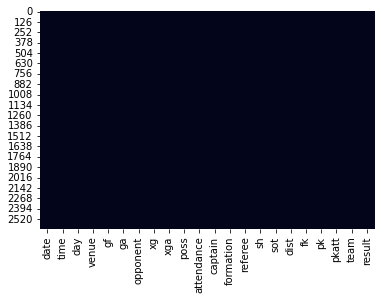

In [24]:
sns.heatmap(matches.isnull(), cbar=False)

In [28]:
#Il y a pas mal de colonnes a convertir en entier 
matches['day'].unique(), matches['venue'].unique(), matches['opponent'].unique(), matches['referee'].unique(), matches['team'].unique(), matches['result'].unique()

(array(['Sat', 'Sun', 'Wed', 'Thu', 'Tue', 'Fri', 'Mon'], dtype=object),
 array(['Home', 'Away'], dtype=object),
 array(['Crystal Palace', 'Arsenal', 'Liverpool', 'Aston Villa',
        'Tottenham', 'Manchester City', 'Southampton', 'Brentford',
        'Norwich City', 'Newcastle Utd', 'Burnley', 'Leicester City',
        'Manchester Utd', 'Watford', 'West Ham', 'Leeds United', 'Everton',
        'Wolves', 'Brighton', 'Chelsea', 'Sheffield Utd', 'Fulham',
        'West Brom'], dtype=object),
 array(['Jonathan Moss', 'Paul Tierney', 'Anthony Taylor',
        'Stuart Attwell', 'Michael Oliver', 'Martin Atkinson',
        'Andy Madley', 'Andre Marriner', 'David Coote', 'Chris Kavanagh',
        'Mike Dean', 'Craig Pawson', 'Kevin Friend', 'Peter Bankes',
        'Jarred Gillett', 'Graham Scott', 'Robert Jones', 'Darren England',
        'Simon Hooper', 'John Brooks', 'Tony Harrington',
        'Michael Salisbury', 'Lee Mason'], dtype=object),
 array(['Chelsea', 'Arsenal', 'Tottenham Hotsp

In [ ]:
#Je transforme Venue et Results en cats.code et les autres en OneHotEncoder pour eviter l ordre des grandes

In [29]:
matches['venue'] = matches['venue'].astype('category').cat.codes
matches['venue'].unique()

array([1, 0], dtype=int8)

In [30]:
matches['result'] = matches['result'].astype('category').cat.codes
matches['result'].unique()

array([2, 0, 1], dtype=int8)

In [31]:
matches.head()

,date,time,day,venue,gf,ga,opponent,xg,xga,poss,...,formation,referee,sh,sot,dist,fk,pk,pkatt,team,result
0,2021-08-14,15:00,Sat,1,3.0,0.0,Crystal Palace,0.9,0.3,62.0,...,3-4-3,Jonathan Moss,13.0,6.0,20.8,4.0,0.0,0.0,Chelsea,2
1,2021-08-22,16:30,Sun,0,2.0,0.0,Arsenal,2.9,0.3,65.0,...,3-4-3,Paul Tierney,22.0,5.0,14.6,0.0,0.0,0.0,Chelsea,2
2,2021-08-28,17:30,Sat,0,1.0,1.0,Liverpool,0.8,2.6,35.0,...,3-4-3,Anthony Taylor,6.0,2.0,12.3,0.0,0.0,0.0,Chelsea,0
3,2021-09-11,17:30,Sat,1,3.0,0.0,Aston Villa,1.1,1.5,57.0,...,3-4-3,Stuart Attwell,12.0,4.0,22.5,0.0,0.0,0.0,Chelsea,2
4,2021-09-19,16:30,Sun,0,3.0,0.0,Tottenham,1.9,0.7,53.0,...,3-4-3,Paul Tierney,20.0,9.0,13.2,0.0,0.0,0.0,Chelsea,2


In [32]:
#Les autres colonnes pour mettre le OneHotEncoder
X_cat = matches[['day', 'opponent', 'referee', 'team']]
X_cat

,day,opponent,referee,team
0,Sat,Crystal Palace,Jonathan Moss,Chelsea
1,Sun,Arsenal,Paul Tierney,Chelsea
2,Sat,Liverpool,Anthony Taylor,Chelsea
3,Sat,Aston Villa,Stuart Attwell,Chelsea
4,Sun,Tottenham,Paul Tierney,Chelsea
...,...,...,...,...
2636,Sun,Tottenham,Andre Marriner,Sheffield United
2637,Sat,Crystal Palace,Simon Hooper,Sheffield United
2638,Sun,Everton,Jonathan Moss,Sheffield United
2639,Wed,Newcastle Utd,Robert Jones,Sheffield United


In [33]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [34]:
X_cat.shape

(2641, 76)

In [35]:
#On doit le reconvertir en DataFrame
X_cat = pd.DataFrame(X_cat)

In [36]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2637,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2639,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#JE prends dans matches toutes les autres colonnes numeriques
X_numerical = matches.drop(['day','opponent','referee', 'team'], axis=1)
#X_numerical.drop(['captain'], axis=1, inplace=True)
X_numerical

,date,time,venue,gf,ga,xg,xga,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,result
0,2021-08-14,15:00,1,3.0,0.0,0.9,0.3,62.0,38965.000000,3-4-3,13.0,6.0,20.8,4.0,0.0,0.0,2
1,2021-08-22,16:30,0,2.0,0.0,2.9,0.3,65.0,58729.000000,3-4-3,22.0,5.0,14.6,0.0,0.0,0.0,2
2,2021-08-28,17:30,0,1.0,1.0,0.8,2.6,35.0,54000.000000,3-4-3,6.0,2.0,12.3,0.0,0.0,0.0,0
3,2021-09-11,17:30,1,3.0,0.0,1.1,1.5,57.0,39969.000000,3-4-3,12.0,4.0,22.5,0.0,0.0,0.0,2
4,2021-09-19,16:30,0,3.0,0.0,1.9,0.7,53.0,60059.000000,3-4-3,20.0,9.0,13.2,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2021-05-02,19:15,0,0.0,4.0,0.5,2.0,34.0,37898.459585,3-4-1-2,8.0,1.0,17.4,0.0,0.0,0.0,1
2637,2021-05-08,15:00,1,0.0,2.0,0.7,2.1,50.0,37898.459585,3-5-2,7.0,0.0,11.4,1.0,0.0,0.0,1
2638,2021-05-16,19:00,0,1.0,0.0,1.6,1.3,38.0,37898.459585,3-4-3,10.0,3.0,17.0,0.0,0.0,0.0,2
2639,2021-05-19,18:00,0,0.0,1.0,0.8,1.5,50.0,10000.000000,3-4-3,11.0,1.0,16.0,1.0,0.0,0.0,1


In [ ]:
#Apres je combine les 2 datasets

In [88]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,result
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,38965.000000,3-4-3,13.0,6.0,20.8,4.0,0.0,0.0,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,65.0,58729.000000,3-4-3,22.0,5.0,14.6,0.0,0.0,0.0,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,54000.000000,3-4-3,6.0,2.0,12.3,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,57.0,39969.000000,3-4-3,12.0,4.0,22.5,0.0,0.0,0.0,2
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,60059.000000,3-4-3,20.0,9.0,13.2,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,37898.459585,3-4-1-2,8.0,1.0,17.4,0.0,0.0,0.0,1
2637,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,37898.459585,3-5-2,7.0,0.0,11.4,1.0,0.0,0.0,1
2638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,37898.459585,3-4-3,10.0,3.0,17.0,0.0,0.0,0.0,2
2639,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,50.0,10000.000000,3-4-3,11.0,1.0,16.0,1.0,0.0,0.0,1


In [95]:
X_all.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
dist      0
fk        0
pk        0
pkatt     0
result    0
Length: 93, dtype: int64

In [94]:
X_all['dist'].fillna(X_all['dist'].mean(), inplace=True)

In [ ]:
#On va normaliser les nbre dans un meme SCALE (MinMaxScaled)

In [51]:
#Pour cette transformation, normalement la date, formation et le time ne doivent pas y etre car ils sont en string ou float et non en int, 
#je la mets donc dans une autre dataset
data = X_all.loc[:,['date','time', 'formation']]
data

,date,time,formation
0,2021-08-14,15:00,3-4-3
1,2021-08-22,16:30,3-4-3
2,2021-08-28,17:30,3-4-3
3,2021-09-11,17:30,3-4-3
4,2021-09-19,16:30,3-4-3
...,...,...,...
2636,2021-05-02,19:15,3-4-1-2
2637,2021-05-08,15:00,3-5-2
2638,2021-05-16,19:00,3-4-3
2639,2021-05-19,18:00,3-4-3


In [97]:
X_all.drop(['date', 'time', 'formation'], axis=1, inplace=True)

In [80]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 90 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           2641 non-null   float64
 1   1           2641 non-null   float64
 2   2           2641 non-null   float64
 3   3           2641 non-null   float64
 4   4           2641 non-null   float64
 5   5           2641 non-null   float64
 6   6           2641 non-null   float64
 7   7           2641 non-null   float64
 8   8           2641 non-null   float64
 9   9           2641 non-null   float64
 10  10          2641 non-null   float64
 11  11          2641 non-null   float64
 12  12          2641 non-null   float64
 13  13          2641 non-null   float64
 14  14          2641 non-null   float64
 15  15          2641 non-null   float64
 16  16          2641 non-null   float64
 17  17          2641 non-null   float64
 18  18          2641 non-null   float64
 19  19          2641 non-null  

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [74]:
X

array([[0. , 0. , 1. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [55]:
#Et dans y, on met notre variable attrition
y = matches['result']
y

0       2
1       2
2       0
3       2
4       2
       ..
2636    1
2637    1
2638    2
2639    1
2640    2
Name: result, Length: 2641, dtype: int8

In [ ]:
#Si je souhaite ajouter data1 au X, ou je reconvertis X en dataframe , et je le concatene avec data1 et ensuite je reonvertis tous en ndarray
#soir je reconvertis data1 en ndarray et apres je l ajoute dans X

In [61]:
#data2 = data[['date', 'formation', 'time']].values()
data2 = data.to_numpy()

In [62]:
data2

array([['2021-08-14', '15:00', '3-4-3'],
       ['2021-08-22', '16:30', '3-4-3'],
       ['2021-08-28', '17:30', '3-4-3'],
       ...,
       ['2021-05-16', '19:00', '3-4-3'],
       ['2021-05-19', '18:00', '3-4-3'],
       ['2021-05-23', '16:00', '3-4-3']], dtype=object)

In [ ]:
#avec concatenate ca n a as marché, et du coup j ai utilisé hstack, qui sert aussi a conncatener 2 ndarray
#plus d infos,   https://fr.acervolima.com/comment-ajouter-deux-tableaux-numpy/

In [64]:
X = np.hstack([X, data2])
X 

array([[0.0, 0.0, 1.0, ..., '2021-08-14', '15:00', '3-4-3'],
       [0.0, 0.0, 0.0, ..., '2021-08-22', '16:30', '3-4-3'],
       [0.0, 0.0, 1.0, ..., '2021-08-28', '17:30', '3-4-3'],
       ...,
       [0.0, 0.0, 0.0, ..., '2021-05-16', '19:00', '3-4-3'],
       [0.0, 0.0, 0.0, ..., '2021-05-19', '18:00', '3-4-3'],
       [0.0, 0.0, 0.0, ..., '2021-05-23', '16:00', '3-4-3']], dtype=object)

In [67]:
len(X), X.shape

(2641, (2641, 93))

In [ ]:
#Split en train et test

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [69]:
X_train.shape, y_train

((1980, 93), 1869    0
 2042    1
 818     1
 1572    0
 690     1
        ..
 917     1
 2196    1
 2577    0
 969     1
 1664    2
 Name: result, Length: 1980, dtype: int8)

In [70]:
X_test.shape, y_test

((661, 93), 26      2
 1830    0
 500     2
 1312    2
 1060    0
        ..
 2085    0
 571     1
 1391    1
 1997    0
 2491    1
 Name: result, Length: 661, dtype: int8)

In [71]:
#Algo avec regression
from sklearn.linear_model import LogisticRegression

In [72]:
logistic = LogisticRegression()
#on va entrainer notre modele avec X_train et y_train
logistic.fit(X_train, y_train)

ValueError: ignored

J AI eu l erreur ci dessus car j ai laissé les colonnes formation, time, date en string alors que notre vectorization avec le modele, ne doit pas en aucun cas contenir des colonnes a caractere string ou autre. Seul type de données autorisé est array of INT.
Donc je devais convertir ces 3 colonnes aussi en INT comme j ai fait pour les autres opponent, team, referee, ....

In [ ]:
DONC JE CONTINUE ICI POUR CORRIGER MON ERREUR 

In [ ]:
J ai donc 2 choix, ou reconvertir en dataframe X, eliminer les 3 colonnes en question et reconverti en np.ndarray

In [ ]:
Bon j ai pris la decision de reutiliser l´objet X avant de le concat avec data, ce qui me donne ce qui suit:

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [100]:
X_train.shape, y_train

((1980, 90), 1479    0
 1951    0
 17      0
 1151    1
 2434    1
        ..
 2552    0
 878     1
 287     2
 1703    0
 1575    0
 Name: result, Length: 1980, dtype: int8)

In [101]:
X_test.shape, y_test

((661, 90), 1837    0
 451     2
 1445    1
 393     0
 2630    1
        ..
 397     0
 2200    2
 211     2
 949     2
 777     2
 Name: result, Length: 661, dtype: int8)

In [102]:
#Algo avec regression
from sklearn.linear_model import LogisticRegression

In [103]:
logistic = LogisticRegression()
#on va entrainer notre modele avec X_train et y_train
logistic.fit(X_train, y_train)

LogisticRegression()

In [104]:
#Une fois que notre modele est entrainé, on va lui passer les donnees de X_test pour qu il fasse la prediction
y_pred = logistic.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1,
       1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1,

In [105]:
#On va meintencant comparer les donnees predictes en y_pred avec celles de y_test qui sont les vraies données réelles
y_test

1837    0
451     2
1445    1
393     0
2630    1
       ..
397     0
2200    2
211     2
949     2
777     2
Name: result, Length: 661, dtype: int8

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
#On mesure pour comparer les donnees predictes contenues dans y_pred et les vraies données en y_test
accuracy_score(y_test, y_pred)

1.0

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[139,   0,   0],
       [  0, 287,   0],
       [  0,   0, 235]])

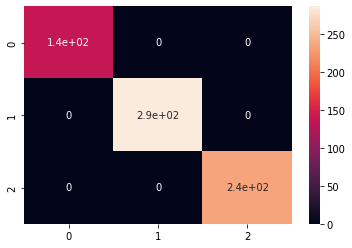

In [110]:
sns.heatmap(cm, annot=True);

In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       235

    accuracy                           1.00       661
   macro avg       1.00      1.00      1.00       661
weighted avg       1.00      1.00      1.00       661



In [ ]:
#TESTABDo

In [114]:
X_novo = matches.iloc[0:1]
X_novo

,date,time,day,venue,gf,ga,opponent,xg,xga,poss,...,formation,referee,sh,sot,dist,fk,pk,pkatt,team,result
0,2021-08-14,15:00,Sat,1,3.0,0.0,Crystal Palace,0.9,0.3,62.0,...,3-4-3,Jonathan Moss,13.0,6.0,20.8,4.0,0.0,0.0,Chelsea,2


In [115]:
#Les autres colonnes pour mettre le OneHotEncoder
X_cat = X_novo[['day', 'opponent', 'referee', 'team']]
X_cat

,day,opponent,referee,team
0,Sat,Crystal Palace,Jonathan Moss,Chelsea


In [129]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [130]:
#On doit le reconvertir en DataFrame
X_cat = pd.DataFrame(X_cat)

In [131]:
X_cat.shape

(1, 4)

In [119]:
#JE prends dans matches toutes les autres colonnes numeriques
X_numerical = X_novo.drop(['day','opponent','referee', 'team'], axis=1)
X_numerical.drop(['captain'], axis=1, inplace=True)
X_numerical

,date,time,venue,gf,ga,xg,xga,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,result
0,2021-08-14,15:00,1,3.0,0.0,0.9,0.3,62.0,38965.0,3-4-3,13.0,6.0,20.8,4.0,0.0,0.0,2


In [120]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,date,time,venue,gf,ga,xg,...,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,result
0,1.0,1.0,1.0,1.0,2021-08-14,15:00,1,3.0,0.0,0.9,...,62.0,38965.0,3-4-3,13.0,6.0,20.8,4.0,0.0,0.0,2


In [121]:
X_all.drop(['date', 'time', 'formation'], axis=1, inplace=True)

In [125]:
X_all

,0,1,2,3,venue,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,result
0,1.0,1.0,1.0,1.0,1,3.0,0.0,0.9,0.3,62.0,38965.0,13.0,6.0,20.8,4.0,0.0,0.0,2


In [127]:
X_all.shape

(1, 18)

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [128]:
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [123]:
#C) PREDICTION
logistic.predict(X)

ValueError: ignored